# Film ROI Feature Engineering

In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from patsy import dmatrices
from sklearn.preprocessing import MultiLabelBinarizer

import regression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pickle

## Import Data

### film_roi_data(cleaned) = df

In [2]:
pickle_in = open('./pickles/film_roi_data(cleaned).pkl', 'rb')
df = pickle.load(pickle_in)
pickle_in.close()

### feature dictionary = feature_dict_analyzed

In [3]:
# Import feature dictionary
pickle_in = open('./pickles/feature_dict_cleaned.pkl', 'rb')
feature_dict_analyzed = pickle.load(pickle_in)
pickle_in.close()

## One Hot Encode Genres
- One-Hot encode genres so they can be incorporated into the analysis later.

In [4]:
df.columns

Index(['title', 'target', 'genres', 'release_date', 'budget', 'opening',
       'north_america', 'box_office_total', 'user_rating', 'user_votes',
       'metacritic', 'runtime', 'articles', 'film_id', 'film_url', 'imdb_url'],
      dtype='object')

In [5]:
# Use scklearn's multilabelbinarizer function to one hot encode and save to a dataframe for use later
mlb = MultiLabelBinarizer()
one_hot_genres = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)
one_hot_genres

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          0          0          0          0       0      0            0   
1          0          0          0          0       0      0            0   
2          0          0          0          1       0      1            0   
3          1          1          0          0       0      0            0   
4          1          0          0          0       0      1            0   
5          1          0          0          0       0      1            0   
6          0          0          0          0       0      0            0   
7          1          1          0          0       0      0            0   
8          1          1          0          0       0      0            0   
9          0          0          0          1       1      0            0   
10         1          1          0          0       0      0            0   
11         0          1          0          0       0      0            0   
12         0          0          0          0       1      0            0   
13         0          0          0          0       0      1            0   
14         1          1          0          0       1      0            0   
15         0          1          1          0       1      0            0   
16         0          0          0          0       0      0            1   
17         1          0          0          0       0      0            0   
18         0          0          0          1       0      0            1   
19         0          1          0          0       0      0            1   
20         0          0          0          0       1      0            0   
21         0          0          0          0       0      0            1   
22         0          0          0          0       0      0            1   
23         0          0          0          0       0      0            1   
24         0          0          0          0       0      0            1   
25         0          0          0          0       0      0            1   
26         1          0          0          0       0      0            0   
27         0          1          0          0       0      0            1   
28         0          0          0          0       0      0            1   
29         0          0          0          0       0      0            1   
...      ...        ...        ...        ...     ...    ...          ...   
1445       1          1          0          0       1      0            0   
1446       1          1          0          0       1      0            0   
1447       1          1          0          0       0      0            0   
1448       1          1          0          0       0      0            0   
1449       0          0          0          1       0      0            0   
1450       0          0          0          0       0      0            0   
1451       0          1          0          0       0      0            0   
1452       1          1          0          0       0      0            0   
1453       1          1          0          0       0      0            0   
1454       0          0          0          1       0      0            0   
1455       0          0          0          1       0      1            0   
1456       1          0          0          0       0      0            0   
1457       1          1          0          0       1      0            0   
1458       0          0          0          0       1      0            0   
1459       1          1          0          0       0      0            0   
1460       1          0          0          0       0      0            0   
1461       0          0          0          0       1      1            0   
1462       1          1          0          0       0      0            0   
1463       0          0          0          0       0      0            0   
1464       0          0          0          0       0      1            0   
14

### Confirm that encodings are catching all genres properly
- It's possible there was an issue with the encoding, so let's check to make sure it worked.
- First let's do a manual visual check.

In [6]:
# Create df of title genre column and one hot encodings
genres_df = pd.concat([df[['title', 'genres']], one_hot_genres], axis=1)
genres_df

title  \
0                                             Gone Girl   
1                                  Beauty and the Beast   
2                                        BlacKkKlansman   
3                                         Black Panther   
4                                           Baby Driver   
5                                             John Wick   
6                                               Get Out   
7                                              Overlord   
8                                             Inception   
9                                            Green Book   
10                                        Suicide Squad   
11                                         Interstellar   
12                                    Crazy Rich Asians   
13                           Bad Times at the El Royale   
14                                           Deadpool 2   
15                            Ralph Breaks the Internet   
16    Deceptive Practice: The Mysteries and Mentors ...   
17                                            Unsullied   
18                         Peggy Guggenheim: Art Addict   
19                                        Free the Mind   
20                                      My Uncle Rafael   
21                              Hillsong: Let Hope Rise   
22                                             Salinger   
23                                            Big Sonia   
24                                 Letters from Baghdad   
25                                 The Other Dream Team   
26                                           Persecuted   
27                                     Above and Beyond   
28                           Who Will Write Our History   
29               America: Imagine the World Without Her   
...                                                 ...   
1445                     Guardians of the Galaxy Vol. 2   
1446                            Guardians of the Galaxy   
1447                                   Fast & Furious 6   
1448                                     Justice League   
1449                               The Greatest Showman   
1450                                   Django Unchained   
1451        Fantastic Beasts: The Crimes of Grindelwald   
1452                                            Aquaman   
1453                                          Furious 7   
1454                                          First Man   
1455                            The Wolf of Wall Street   
1456                                              Venom   
1457                                     Thor: Ragnarok   
1458                               Mary Poppins Returns   
1459                                  Jupiter Ascending   
1460                                  Blade Runner 2049   
1461                                     A Simple Favor   
1462                             Spider-Man: Homecoming   
1463                                     A Star Is Born   
1464                                             Widows   
1465                      Mission: Impossible - Fallout   
1466                                Clash of the Titans   
1467                                  The Hateful Eight   
1468                            The Fate of the Furious   
1469                                         Hereditary   
1470                             Avengers: Infinity War   
1471                                  Bohemian Rhapsody   
1472                                                 It   
1473                  Spider-Man: Into the Spider-Verse   
1474                                      The Favourite   

                                 genres  Action  Adventure  Animation  \
0            [Drama, Mystery, Thriller]       0          0          0   
1            [Family, Fantasy, Musical]       0          0          0   
2             [Biography, Crime, Drama]       0          0          0   
3           [Action, Adventure, Sci-Fi]       1          1          0   
4                [Action, 

- Looks good with the manual check, but let's double check to make sure. We'll <font color=blue>create a function that checks every encoding.</font>

In [7]:
regression.check_genres(genres_df)

All encodings are correct!


### Drop 1 column from one_hot_encoding

In [8]:
# Drop News column
one_hot_genres.drop(columns=['News'], inplace=True)
one_hot_genres.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

- __Excellent, it works! And we've confirmed that all of the encodings are correct.__
- __We have the encodings df now, but we don't want to append it to the df yet, as that will make the pairplot a little crazy. We'll save it for later.__

## EDA & Feature Engineering
- Explore the variables and their relationships.

__Reduce df variables to numerical values only__

- Some processes moving forward require the df to only have numerical values, so we will create a new numerical version of the df.
- <font color='red'> NOTE: We need to return to *genres* and *release dates* for analysis.</font>

In [9]:
# Save full dataset for future reference
df_all = df.copy()

### Remove URL and ID columns = df

In [13]:
df = df[['target', 'budget', 'opening', 'north_america', 'box_office_total', 
          'user_rating', 'user_votes', 'metacritic', 'runtime', 'articles']]

In [14]:
df.describe()

target        budget       opening  north_america  \
count  1475.000000  1.475000e+03  1.475000e+03   1.475000e+03   
mean      4.198394  4.741494e+07  1.919461e+07   6.341127e+07   
std      11.725209  5.451109e+07  2.948108e+07   8.971441e+07   
min       0.002688  1.000000e+05  2.693000e+03   4.550000e+03   
25%       1.100361  1.000000e+07  9.819565e+05   9.415042e+06   
50%       2.449600  2.600000e+07  1.035251e+07   3.380086e+07   
75%       4.357540  6.000000e+07  2.360260e+07   7.781173e+07   
max     381.644100  3.210000e+08  2.576982e+08   9.366622e+08   

       box_office_total  user_rating    user_votes   metacritic      runtime  \
count      1.475000e+03  1475.000000  1.475000e+03  1475.000000  1475.000000   
mean       1.581893e+08     6.391525  1.314687e+05    54.007458   108.496271   
std        2.458027e+08     0.961083  1.691306e+05    17.525614    16.404998   
min        4.550000e+03     1.400000  8.600000e+01     2.000000    63.000000   
25%        1.712471e+07     5.800000  2.892550e+04    41.000000    96.000000   
50%        6.449392e+07     6.400000  7.456300e+04    54.000000   106.000000   
75%        1.813940e+08     7.100000  1.670525e+05    66.000000   118.000000   
max        2.068224e+09     8.800000  1.868287e+06   100.000000   180.000000   

           articles  
count   1475.000000  
mean    1482.360000  
std     2500.591818  
min        1.000000  
25%      252.500000  
50%      687.000000  
75%     1707.000000  
max    28866.000000

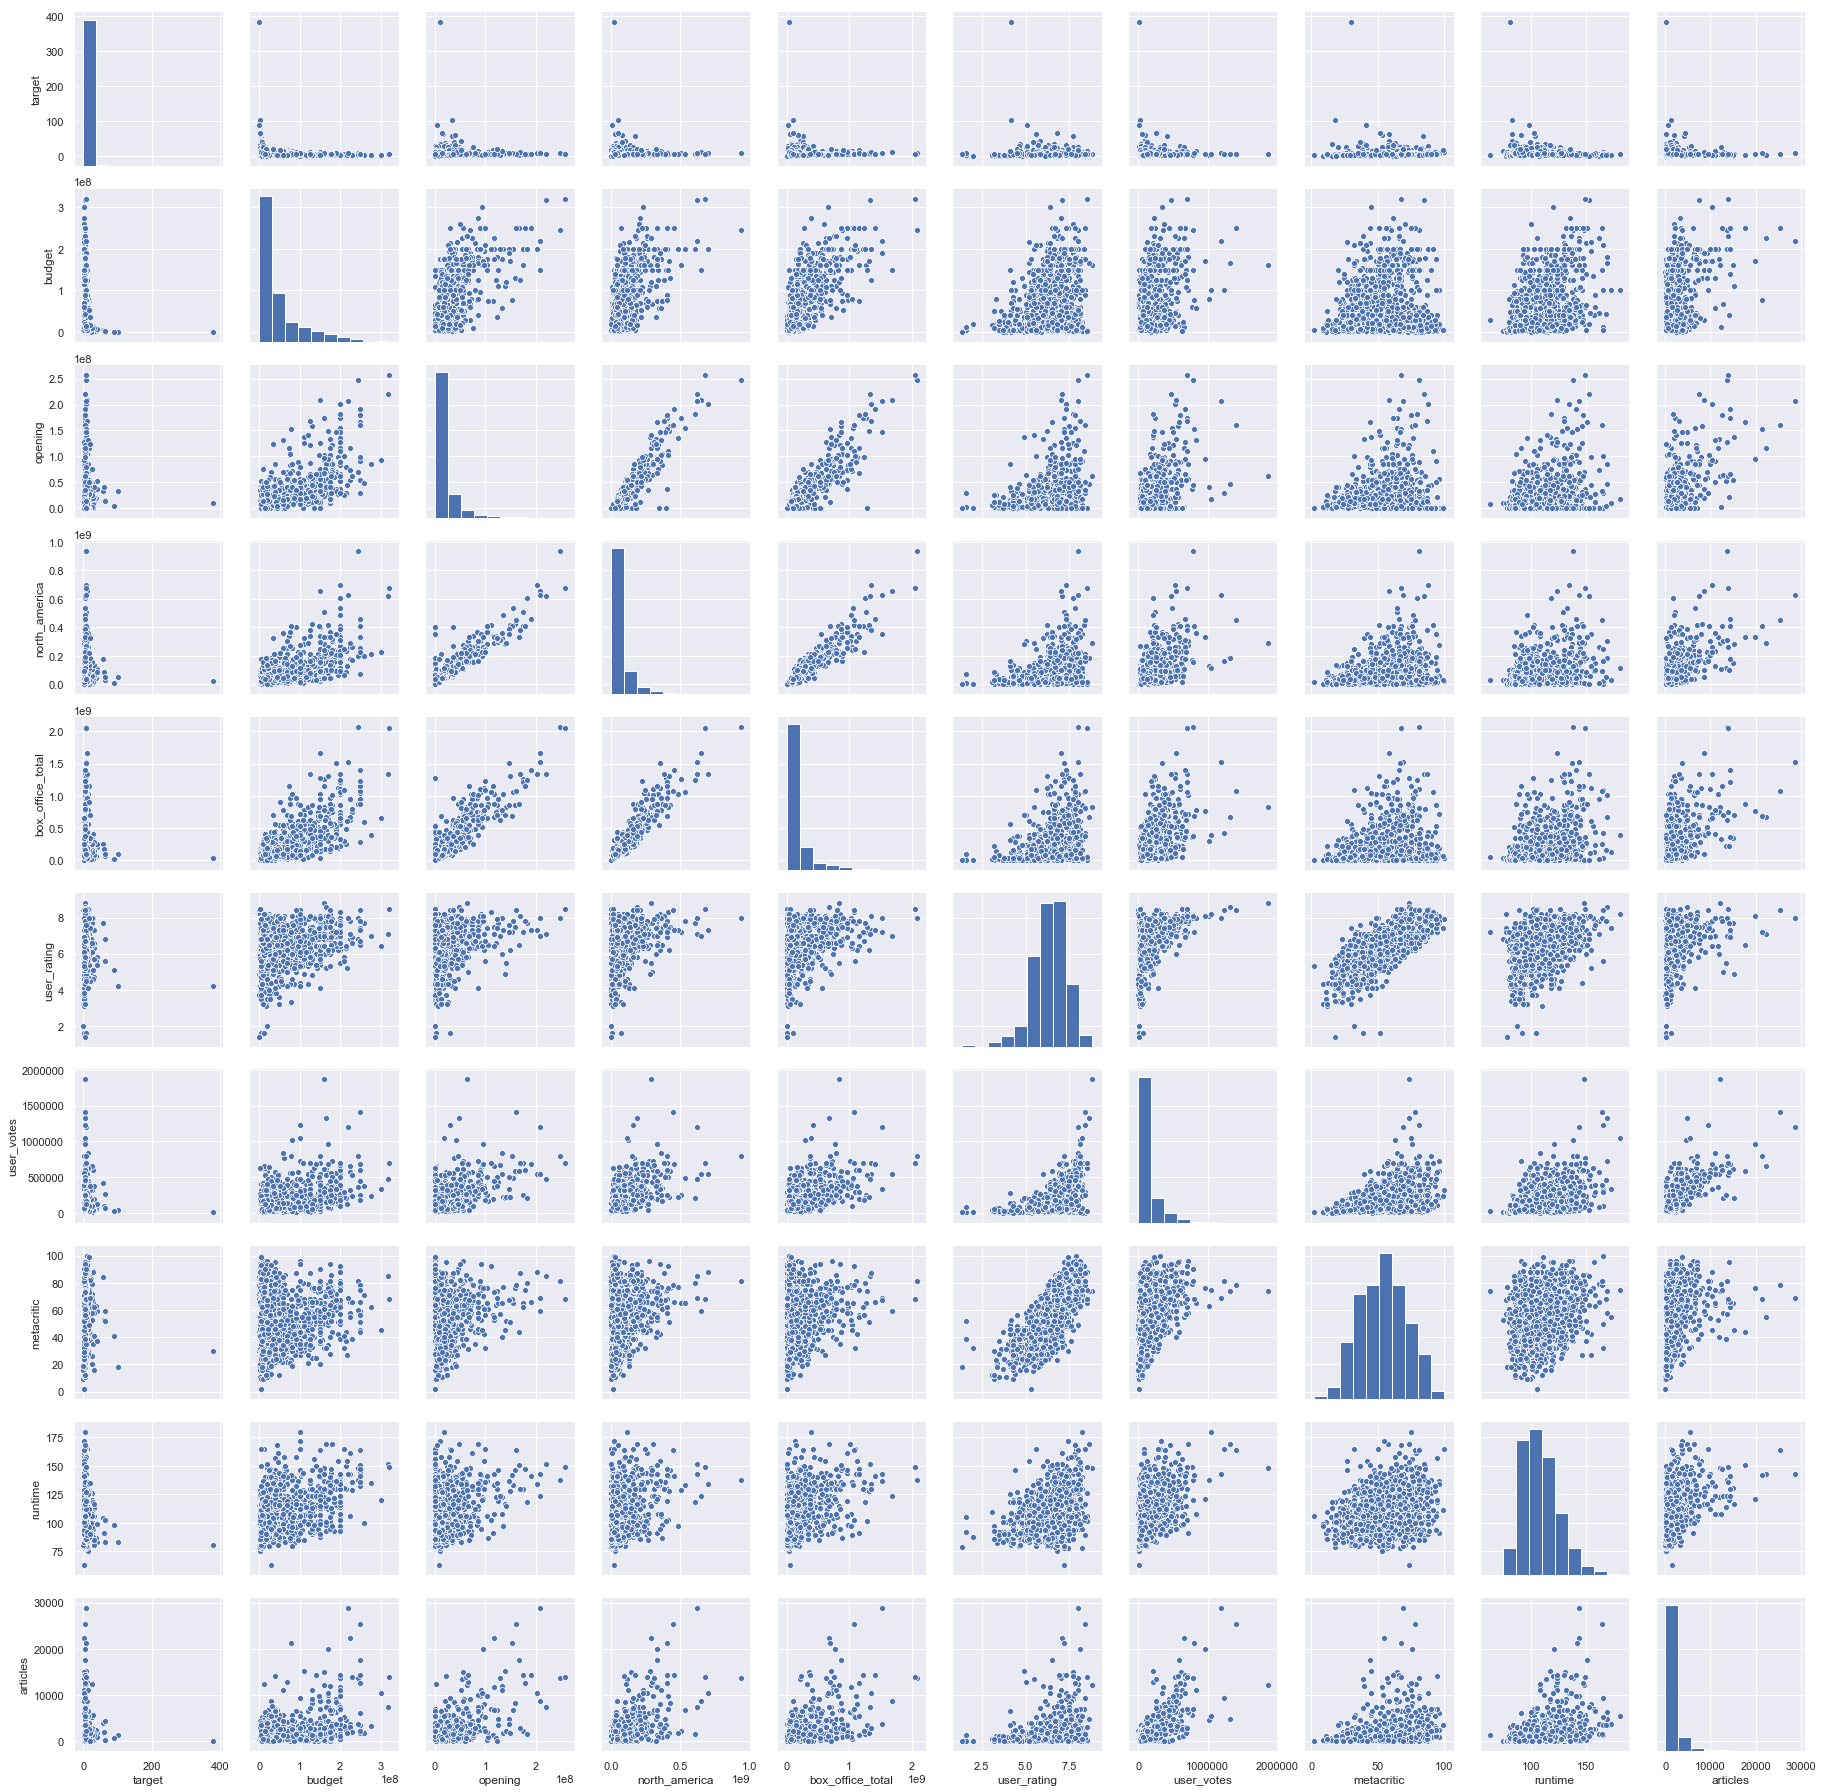

In [15]:
sns.pairplot(data=df)

- We're getting some plots that are interesting and useful, but others that are not. 
- Also a number of the distributions are clearly not normal.
- Applying a transform may make the relationships clearer and normalize the data.
- A __log transform__ is the simplest, but we need to make sure there are no zero values that will make the pairplot fail.

In [16]:
df.describe()

target        budget       opening  north_america  \
count  1475.000000  1.475000e+03  1.475000e+03   1.475000e+03   
mean      4.198394  4.741494e+07  1.919461e+07   6.341127e+07   
std      11.725209  5.451109e+07  2.948108e+07   8.971441e+07   
min       0.002688  1.000000e+05  2.693000e+03   4.550000e+03   
25%       1.100361  1.000000e+07  9.819565e+05   9.415042e+06   
50%       2.449600  2.600000e+07  1.035251e+07   3.380086e+07   
75%       4.357540  6.000000e+07  2.360260e+07   7.781173e+07   
max     381.644100  3.210000e+08  2.576982e+08   9.366622e+08   

       box_office_total  user_rating    user_votes   metacritic      runtime  \
count      1.475000e+03  1475.000000  1.475000e+03  1475.000000  1475.000000   
mean       1.581893e+08     6.391525  1.314687e+05    54.007458   108.496271   
std        2.458027e+08     0.961083  1.691306e+05    17.525614    16.404998   
min        4.550000e+03     1.400000  8.600000e+01     2.000000    63.000000   
25%        1.712471e+07     5.800000  2.892550e+04    41.000000    96.000000   
50%        6.449392e+07     6.400000  7.456300e+04    54.000000   106.000000   
75%        1.813940e+08     7.100000  1.670525e+05    66.000000   118.000000   
max        2.068224e+09     8.800000  1.868287e+06   100.000000   180.000000   

           articles  
count   1475.000000  
mean    1482.360000  
std     2500.591818  
min        1.000000  
25%      252.500000  
50%      687.000000  
75%     1707.000000  
max    28866.000000

- No zero values so we're good to go with the log transform.

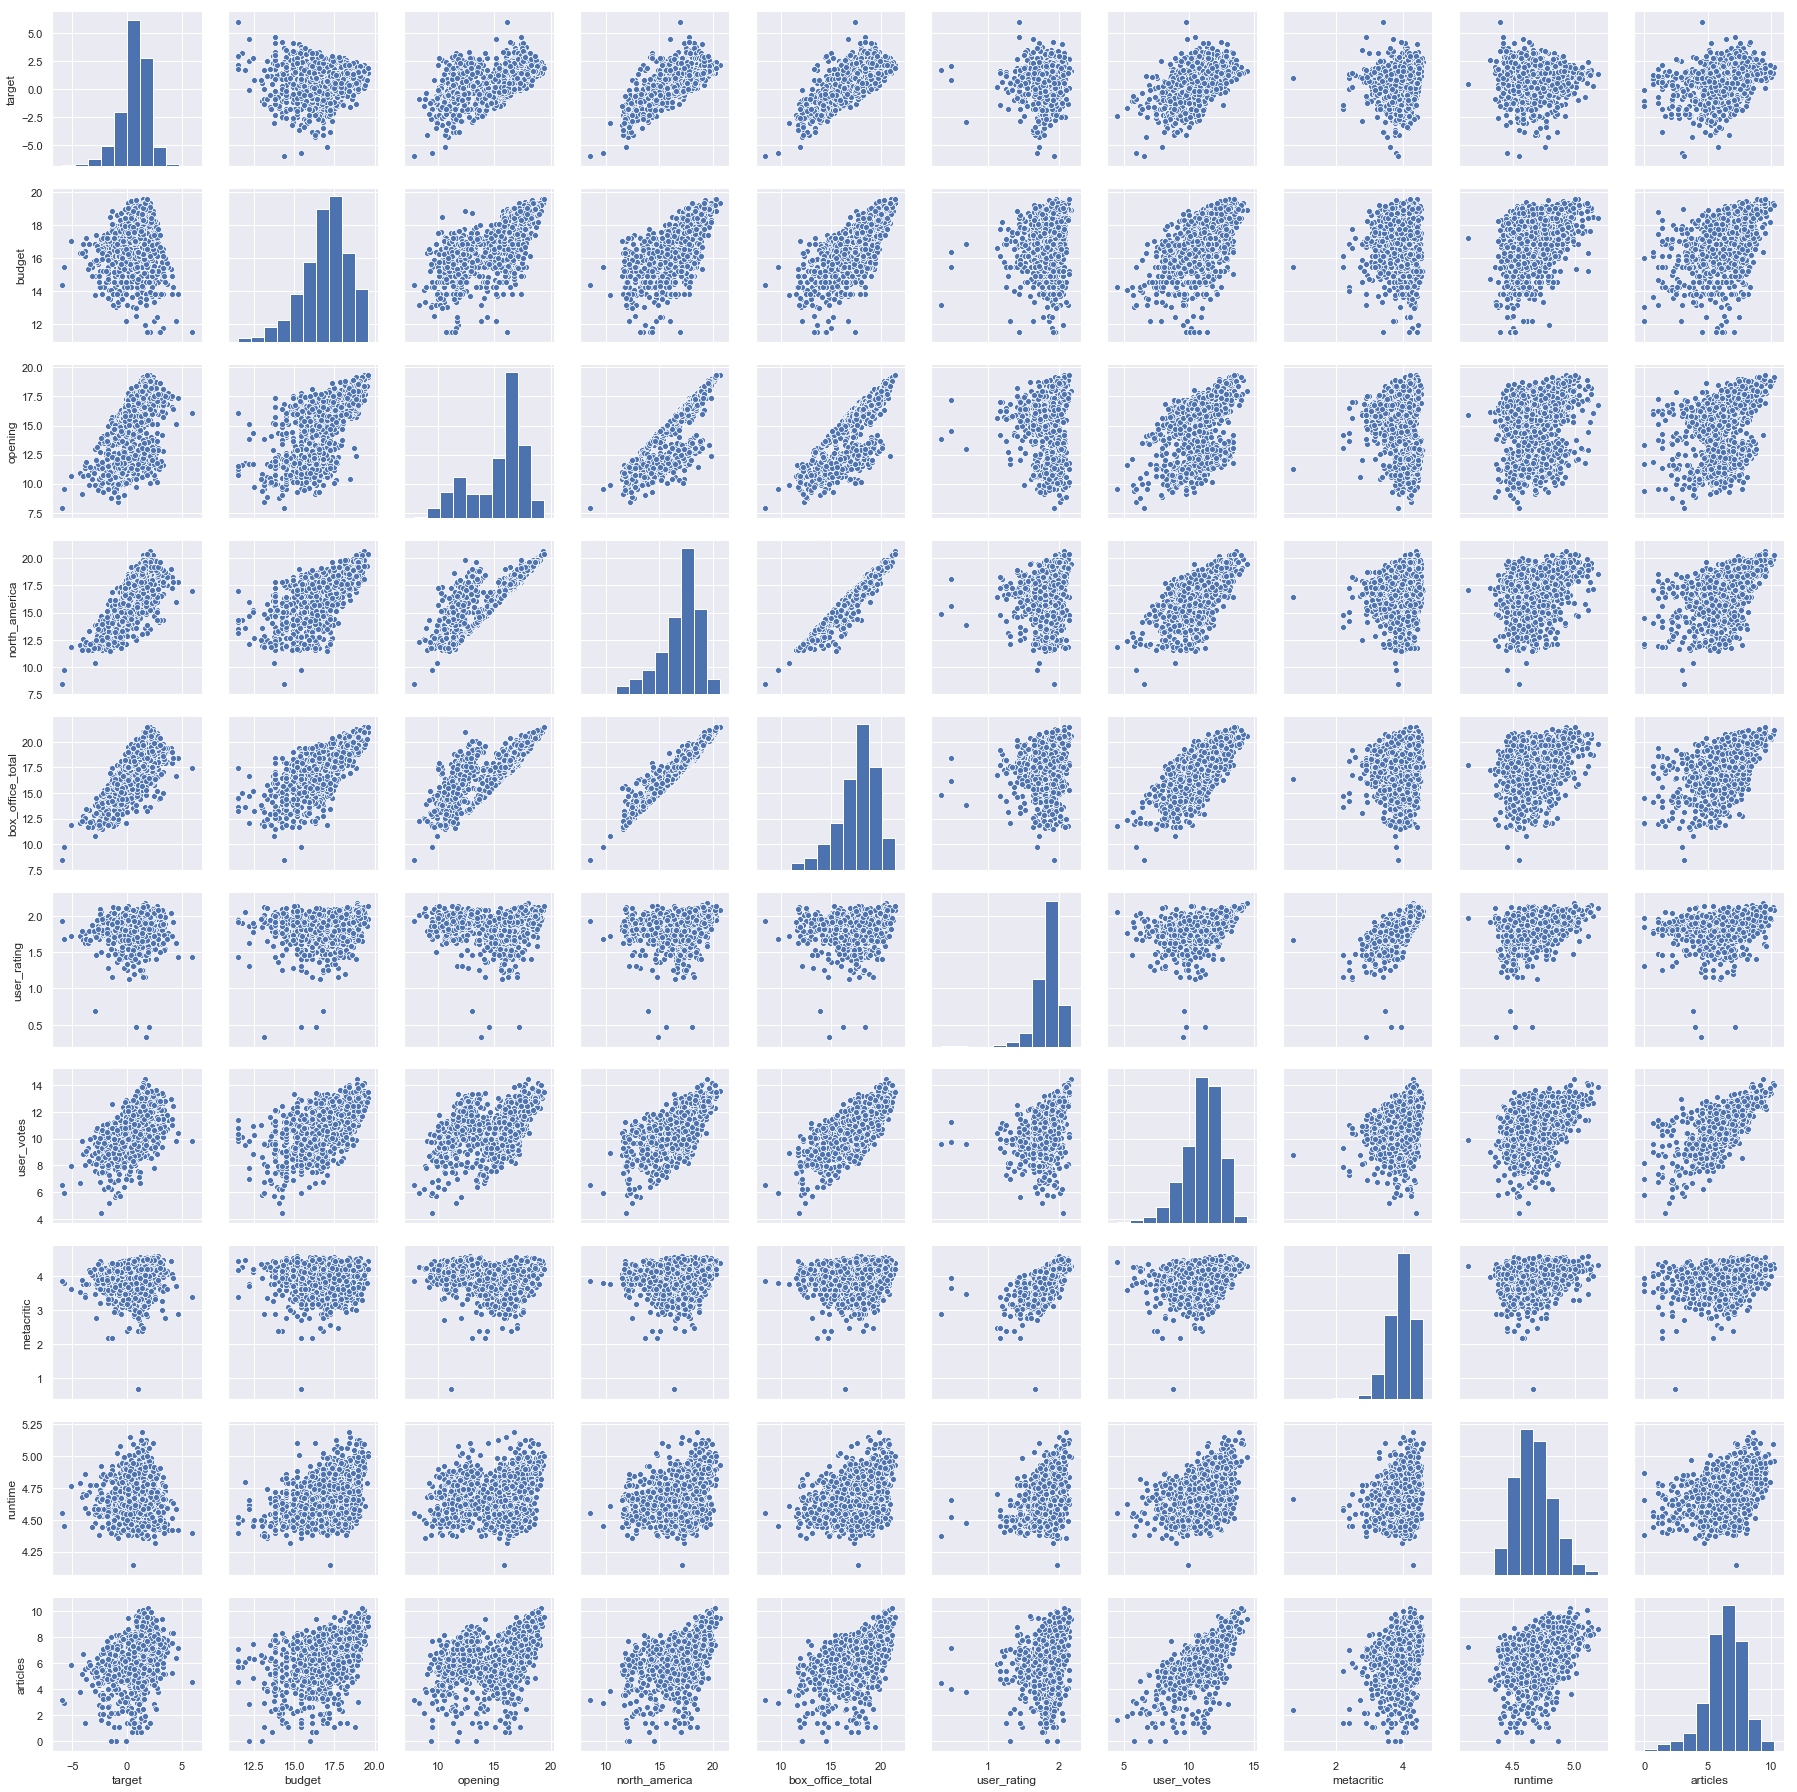

In [17]:
sns.pairplot(np.log(df))

- Ok some obvious and unsurprising correlations between __target__ and __gross__ numbers.
- Also obvious correlations between gross numbers themselves. Some have high visual colinearity. Also not surprising.
- Let's take a closer look at just target, the gross numbers and budget.

### Target and Gross Numbers/Budget
- Reduce the amount of variables to make the variable to variable relationships easier to see. 

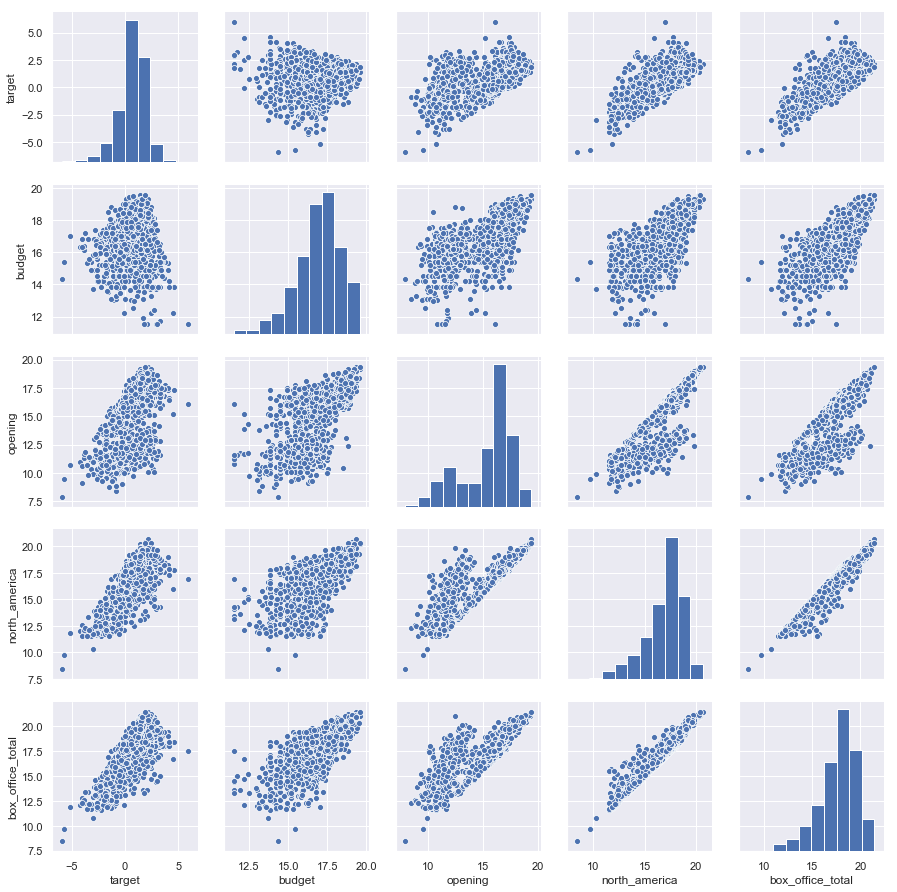

In [18]:
sns.pairplot(data=np.log(df), vars=['target', 'budget', 'opening', 'north_america', 'box_office_total'])

- Very strong correlation pattern between __target__ and __opening/north_america/box_office_total__.
- The relationship between __target__ and __budget__ is not as clear, but might warrant further investigation. seems like there may be a light inverse relationship.
- One additional ratio that may be useful is the international ratio of the total. We'll calculate that as the (box_office_total - north_america)/budget.
- Because of these strong relationships it might be worth it to do some __feature engineering__ to create features of the ratio of the opening gross and north_america gross to the budget.

### Add Features = df
- __budget/opening__: How much of the budget is recouped in the opening weekend. This is the feature of greatest interest, as we are very curious how much the Hollywood focus on the opening weekend is warranted.
- __north_america & intl/box_office_total__: How much of the gross is North American or international revenue. This asks how much of a predictor of success the NA vs intl ratio is. 

In [19]:
# Note that this syntax avoids the SettingWithCopy warning. 
# See the "Returning a view versus a copy" section for more: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

# Ratio of the opening gross to the budget. How much of the budget is recouped on the opening weekend.
df.loc[:, 'opening_ratio'] = df['opening'] / df['budget']
# What proportion of the total gross is made up of the North American gross
df.loc[:, 'na_ratio'] = df['north_america'] / df['box_office_total']
# What proportion of the total gross is made up of the international gross
df.loc[:, 'intl_ratio'] = (df['box_office_total'] - df['north_america']) / df['box_office_total']
df.head()

target       budget      opening  north_america  box_office_total  \
0  6.054596   61000000.0   37513109.0    167767189.0      3.693304e+08   
1  7.897007  160000000.0  174750616.0    504014165.0      1.263521e+09   
2  6.226722   15000000.0   10845330.0     49275340.0      9.340082e+07   
3  6.734566  200000000.0  202003951.0    700059566.0      1.346913e+09   
4  6.674855   34000000.0   20553320.0    107825862.0      2.269451e+08   

   user_rating  user_votes  metacritic  runtime  articles  opening_ratio  \
0          8.1    774051.0        79.0    149.0    5581.0       0.614969   
1          7.2    244247.0        65.0    129.0    2197.0       1.092191   
2          7.5    161476.0        83.0    135.0    1646.0       0.723022   
3          7.3    537530.0        88.0    134.0   10435.0       1.010020   
4          7.6    378343.0        86.0    113.0    1621.0       0.604509   

   na_ratio  intl_ratio  
0  0.454247    0.545753  
1  0.398897    0.601103  
2  0.527569    0.472431  
3  0.519751    0.480249  
4  0.475119    0.524881

In [20]:
# Updated feature dictionary
feature_dict_analyzed['opening_ratio'] = 'opening/budget, the amount of budget recouped on opening weekend'
feature_dict_analyzed['na_ratio'] = 'north_america/box_office_total, how much of total revenue is North American revenue'
feature_dict_analyzed['intl_ratio'] = '(box_office_total - north_america)/box_office_total, how much of total revenue is international revenue'

In [21]:
df.describe()

target        budget       opening  north_america  \
count  1475.000000  1.475000e+03  1.475000e+03   1.475000e+03   
mean      4.198394  4.741494e+07  1.919461e+07   6.341127e+07   
std      11.725209  5.451109e+07  2.948108e+07   8.971441e+07   
min       0.002688  1.000000e+05  2.693000e+03   4.550000e+03   
25%       1.100361  1.000000e+07  9.819565e+05   9.415042e+06   
50%       2.449600  2.600000e+07  1.035251e+07   3.380086e+07   
75%       4.357540  6.000000e+07  2.360260e+07   7.781173e+07   
max     381.644100  3.210000e+08  2.576982e+08   9.366622e+08   

       box_office_total  user_rating    user_votes   metacritic      runtime  \
count      1.475000e+03  1475.000000  1.475000e+03  1475.000000  1475.000000   
mean       1.581893e+08     6.391525  1.314687e+05    54.007458   108.496271   
std        2.458027e+08     0.961083  1.691306e+05    17.525614    16.404998   
min        4.550000e+03     1.400000  8.600000e+01     2.000000    63.000000   
25%        1.712471e+07     5.800000  2.892550e+04    41.000000    96.000000   
50%        6.449392e+07     6.400000  7.456300e+04    54.000000   106.000000   
75%        1.813940e+08     7.100000  1.670525e+05    66.000000   118.000000   
max        2.068224e+09     8.800000  1.868287e+06   100.000000   180.000000   

           articles  opening_ratio     na_ratio   intl_ratio  
count   1475.000000    1475.000000  1475.000000  1475.000000  
mean    1482.360000       0.664306     0.542169     0.457831  
std     2500.591818       2.945281     0.246054     0.246054  
min        1.000000       0.000309     0.018133     0.000000  
25%      252.500000       0.092096     0.348017     0.281144  
50%      687.000000       0.298003     0.502603     0.497397  
75%     1707.000000       0.582295     0.718856     0.651983  
max    28866.000000      98.084630     1.000000     0.981867

- __intl_ratio has zeros in the values which will prevent us from doing a log tranform.__

- Important decision to make here. We have 56 movies that seem to have not had an international release so what to do with them? 
- Fundamentally the question is, for the purposes of this analysis, do we want or care about films that have not been released internationally? __Because I feel that those who would use this analysis are concerned about getting the greatest ROI and today that means getting international distribution, I'm going to eliminate films that did not have an international release.__
- Later however, I might want to do an analysis that does not take the international market into account, in which case I would keep these in. 

## Remove Films with 0 intl_ratio

### Merge df and one_hot_genres = df_merge

In [22]:
# Merge one_hot_genres before dropping
df_merge = pd.concat([df, one_hot_genres], axis=1)

### Drop observations from merged df = df_drop

In [23]:
drop_index = df_merge.loc[df['intl_ratio'] == 0].index
df_drop = df_merge.drop(index=drop_index)

- With this update the lowest intl ratio is very low (0.036%), but that means that there was at least some kind of international release. 

### Create df with no genres = df_ng

In [24]:
df_ng = df_drop.iloc[:, :13]

## Apply transformations 
- Apply log and Yeo-Johnson transformations for pairplotting

### Log Transformation

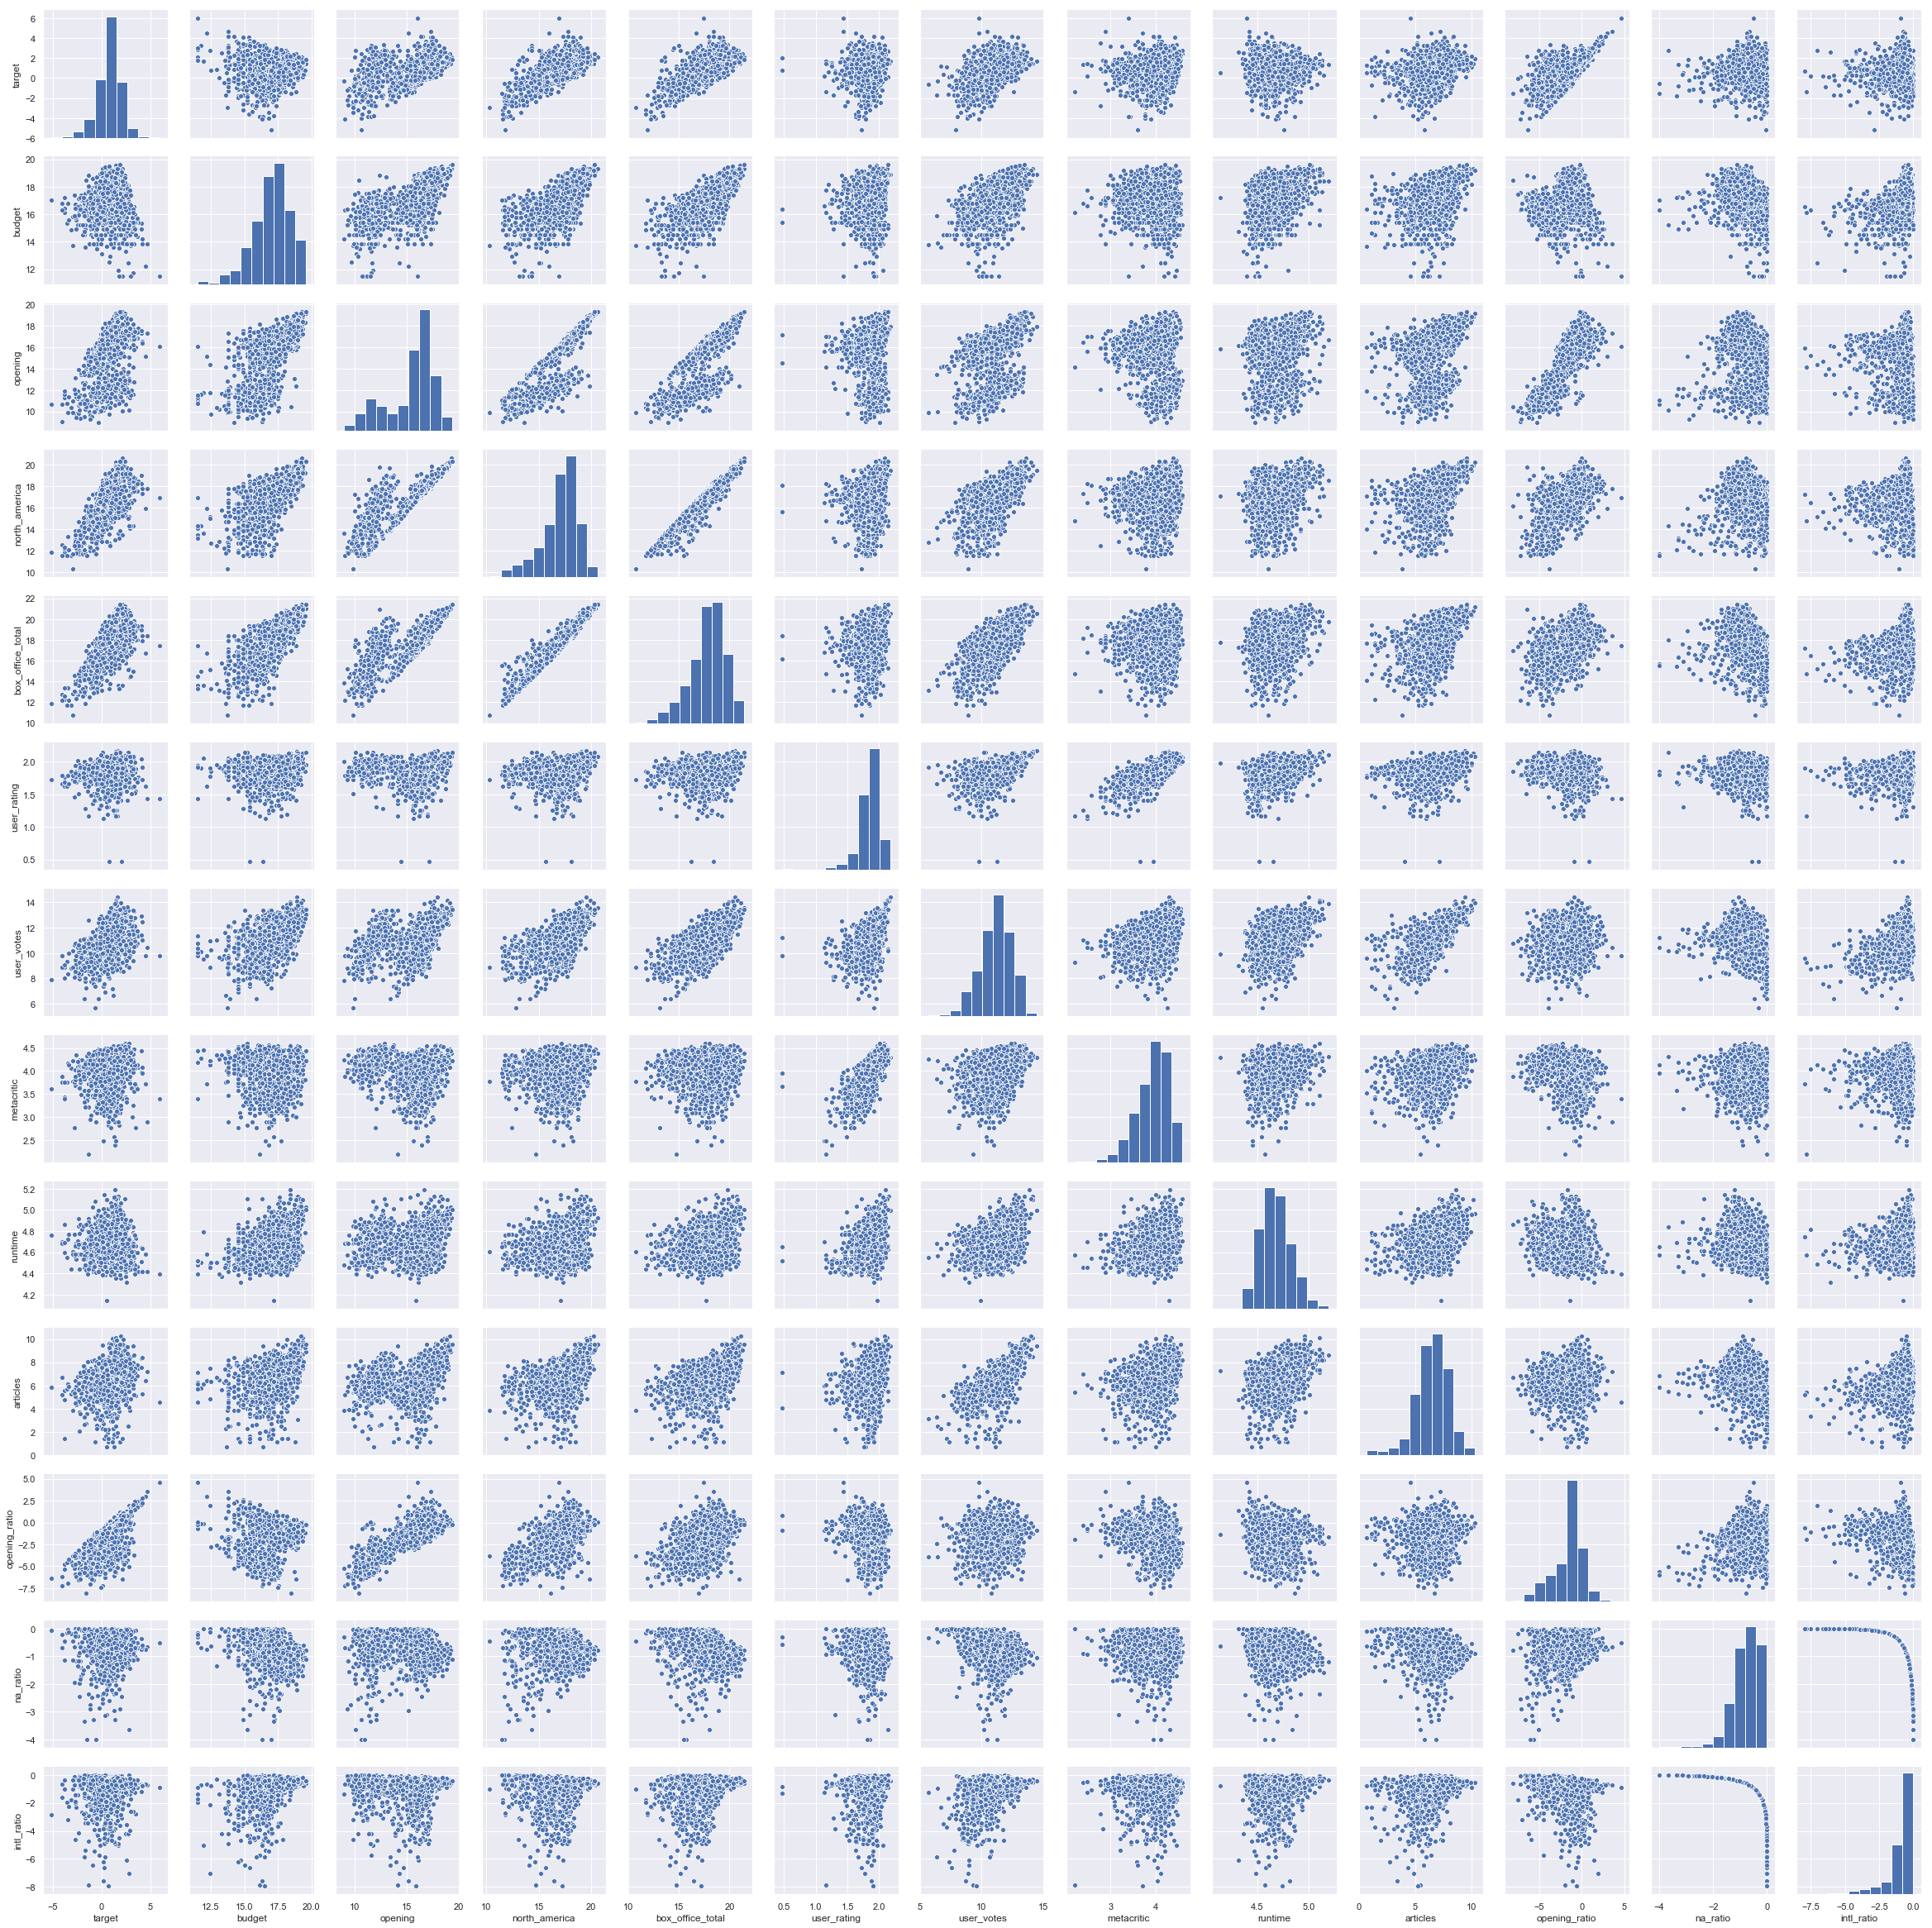

In [25]:
# Log transformed pairplot
sns.pairplot(np.log(df_ng))

### Yeo-Johnson Transformation (no genres) = df_yj_ng

In [26]:
# Create yeo-johnson transformed data
df_yj_ng = regression.transform_data(df_ng, transform='yeo-johnson')

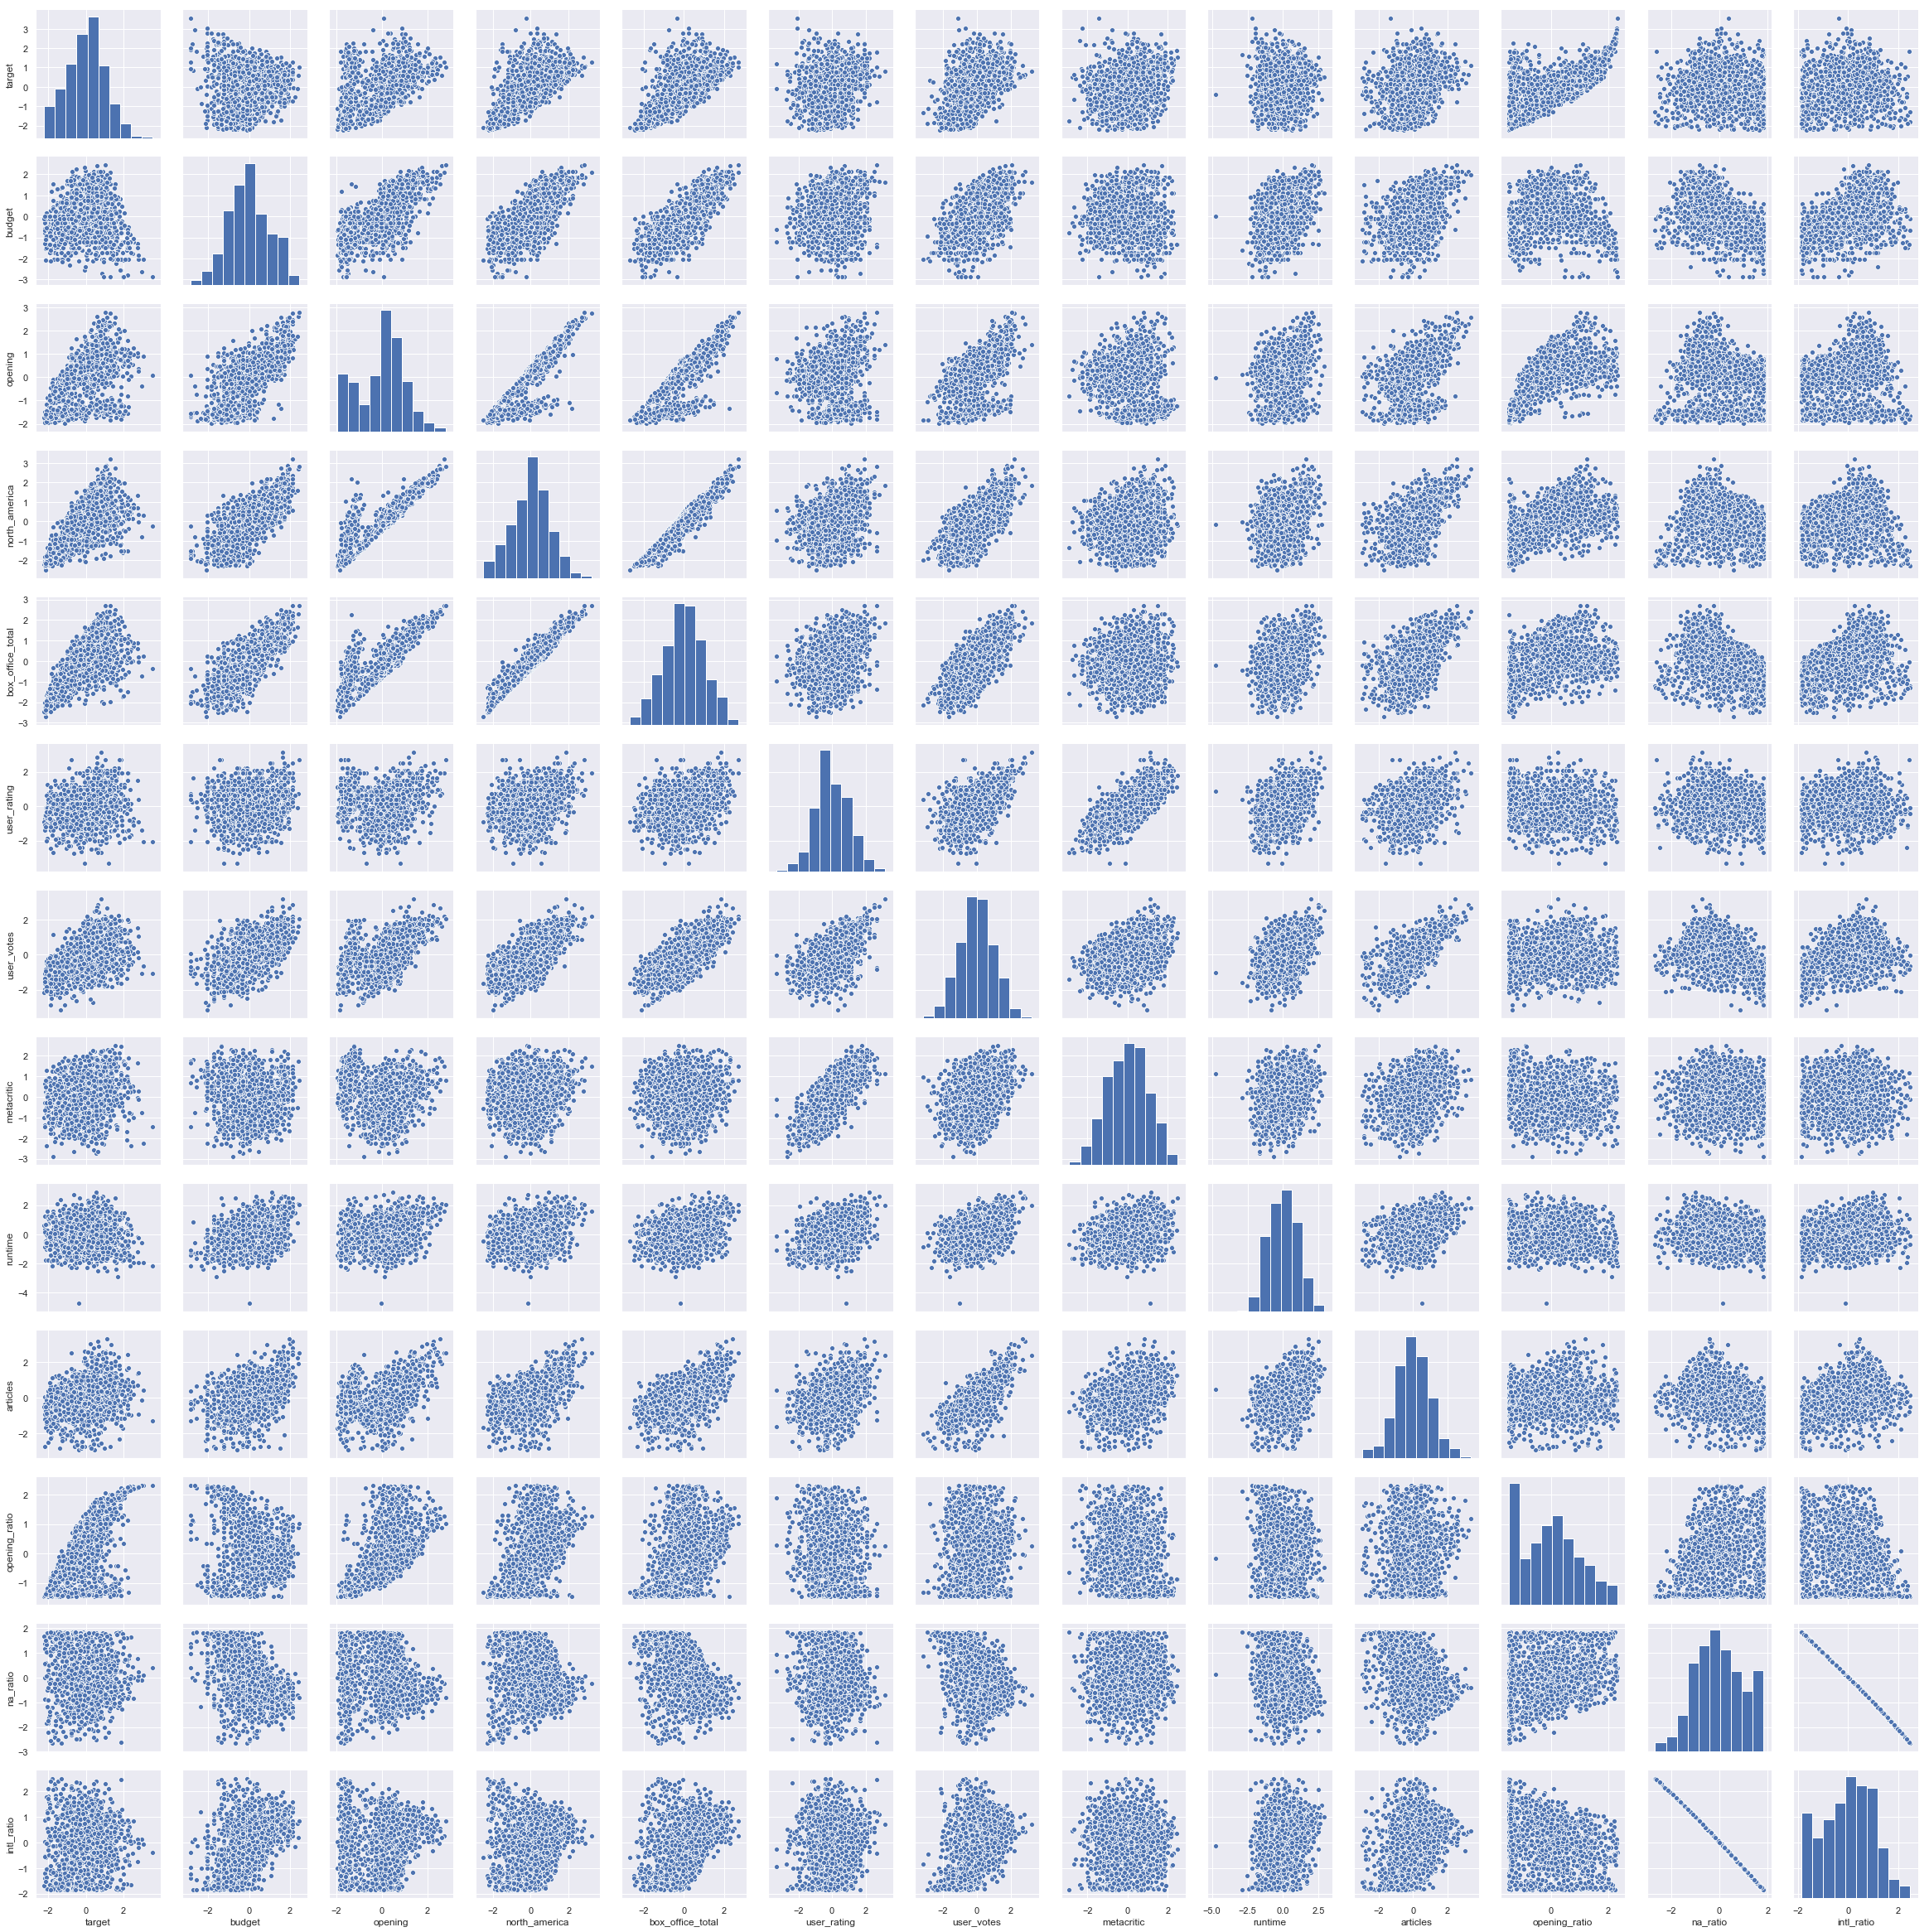

In [27]:
sns.pairplot(df_yj_ng)

- Significant multicollinearity amongst a number of features. na_ratio is pretty much exactly the same as intl_ratio, which is exactly what you would expect.
- __We need to deal with this multicollinearity.__

## Correlations and Multicollinearity
- Looking at the pairplots we have significant multicollinearity due to so many of the variables being factors of another, so let's see how significant this multicollinearity is on a heat map. 

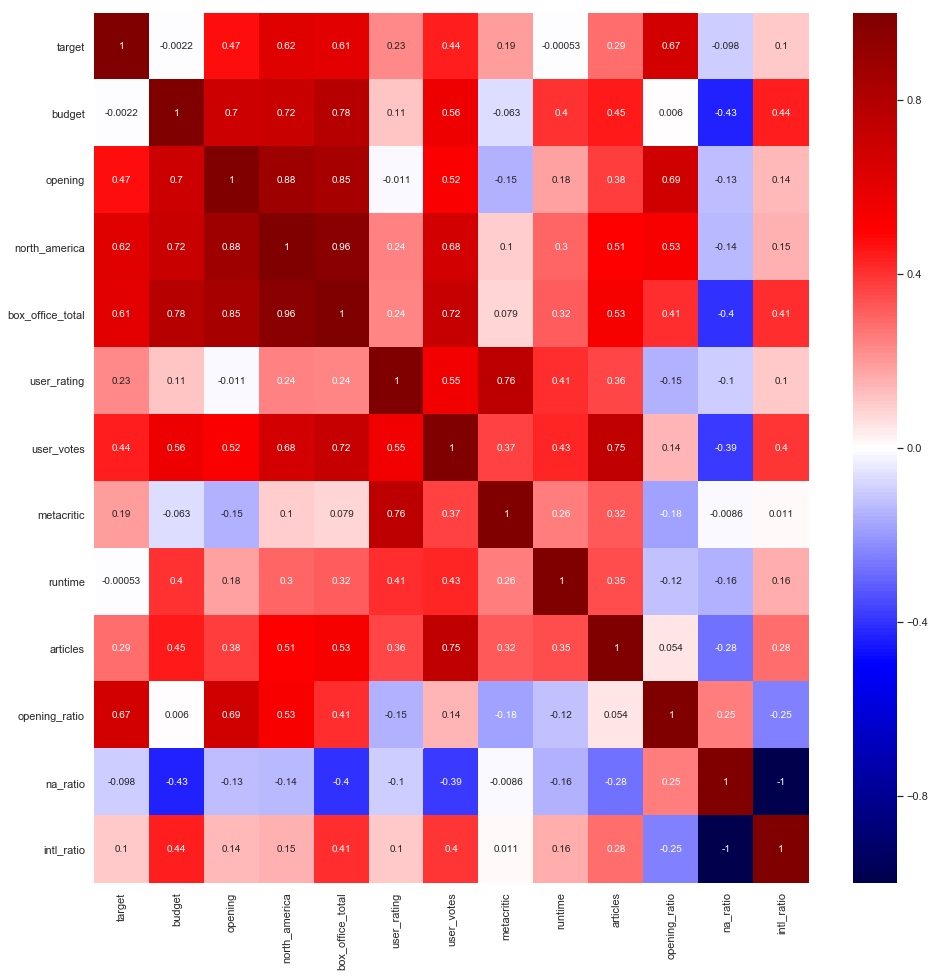

In [28]:
# Heat map to see what the correlations are between variables, collinearity
plt.figure(figsize=(16,16))
sns.heatmap(df_yj_ng.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

- The heatmap approach is good and you can use metrics for the proportion of correlation to determine which collinear items are problematic, but a more robust approach to this is to use the __Variance Inflation Factor__.

### Merge one_hot_genres and YJ transformed features = df_yj

In [29]:
df_yj = pd.concat([df_yj_ng, df_drop.reset_index(drop=True).iloc[:, 13:]], axis=1)

In [30]:
# Check for NaN
df_yj.isnull().values.any()

False

### Calculate Variance Inflation Factor (VIF)

In [31]:
# Create design matrix of features
X = df_yj.iloc[:, 1:]

# Add constant
X = add_constant(X)

# VIF series
VIF_series = pd.Series([variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])], 
                       index=X.columns)
VIF_series

const                 24.683249
budget                17.239848
opening               29.474925
north_america        146.926679
box_office_total     155.213017
user_rating            4.096932
user_votes             6.875463
metacritic             2.899722
runtime                2.148405
articles               2.602439
opening_ratio         14.845208
na_ratio            2984.784036
intl_ratio          2805.339912
Action                 2.102720
Adventure              2.276376
Animation              2.020821
Biography              1.440893
Comedy                 2.431660
Crime                  1.411480
Documentary            1.438446
Drama                  2.408281
Family                 1.290670
Fantasy                1.356049
History                1.207155
Horror                 1.775074
Music                  1.160591
Musical                1.034781
Mystery                1.392325
Romance                1.440029
Sci-Fi                 1.449274
Sport                  1.132776
Thriller

- First bear in mind that the rule of thumb is that a __VIF of > 5__ indicates features we may want to address. 
- Not surprisingly, the problematic features have factors in common
    - budget - budget is folded into opening_ratio 
    - opening -  folded into opening_ratio
    - north_america - folded into na_ratio
    - box_office_total - folded into na_ratio and intl_ratio
    - opening_ratio - contains opening
    - na_ratio - contains north_america and box_office_total
    - intl_ratio - contains north_america and box_office_total 
- We'll have to experiment a bit to find out which items we can remove to take care of the high VIFs.
    - opening - factor of opening_ratio so not adding anything new
    - na_ratio & intl_ratio - these are post theatrical run numbers and will probably only be interesting to evaluate separate from the main regression. 

In [32]:
# Create design matrix of features
X1 = df_yj.iloc[:, 1:].drop(columns=['opening', 'na_ratio', 'intl_ratio'])

# Add constant
X1 = add_constant(X1)

# VIF series
VIF_series = pd.Series([variance_inflation_factor(X1.values, i)
                       for i in range(X1.shape[1])], 
                       index=X1.columns)
VIF_series

const               24.620036
budget               6.653931
north_america       21.124834
box_office_total    21.053788
user_rating          4.054375
user_votes           6.622725
metacritic           2.877392
runtime              2.136034
articles             2.553743
opening_ratio        3.712510
Action               2.097979
Adventure            2.262001
Animation            1.988837
Biography            1.418643
Comedy               2.429388
Crime                1.410488
Documentary          1.433262
Drama                2.390524
Family               1.289198
Fantasy              1.350588
History              1.201336
Horror               1.771282
Music                1.157181
Musical              1.023165
Mystery              1.375992
Romance              1.438121
Sci-Fi               1.447638
Sport                1.127470
Thriller             1.675285
War                  1.046705
Western              1.042647
dtype: float64

- Much better overall, but north_america and box_office_total are still problematic. Let's remove those as well

In [33]:
# Create design matrix of features
X2 = df_yj.iloc[:, 1:].drop(columns=['opening', 'na_ratio', 'intl_ratio',
                                         'north_america'])

# Add constant
X2 = add_constant(X2)

# VIF series
VIF_series = pd.Series([variance_inflation_factor(X2.values, i)
                       for i in range(X2.shape[1])], 
                       index=X2.columns)
VIF_series

const               24.594955
budget               6.306859
box_office_total     8.559781
user_rating          4.028337
user_votes           6.586258
metacritic           2.815226
runtime              2.128600
articles             2.516611
opening_ratio        2.454834
Action               2.087696
Adventure            2.244910
Animation            1.987590
Biography            1.410950
Comedy               2.392123
Crime                1.410229
Documentary          1.433262
Drama                2.390359
Family               1.288661
Fantasy              1.347144
History              1.199832
Horror               1.759643
Music                1.156485
Musical              1.022988
Mystery              1.367472
Romance              1.432125
Sci-Fi               1.445953
Sport                1.126238
Thriller             1.665372
War                  1.043775
Western              1.041877
dtype: float64

In [34]:
# Create design matrix of features
X2 = df_yj.iloc[:, 1:].drop(columns=['opening', 'na_ratio', 'intl_ratio',
                                         'north_america', 'box_office_total'])

# Add constant
X2 = add_constant(X2)

# VIF series
VIF_series = pd.Series([variance_inflation_factor(X2.values, i)
                       for i in range(X2.shape[1])], 
                       index=X2.columns)
VIF_series

const            24.593892
budget            3.742150
user_rating       4.028306
user_votes        5.346148
metacritic        2.808896
runtime           2.126532
articles          2.514226
opening_ratio     1.346704
Action            2.074713
Adventure         2.214139
Animation         1.940845
Biography         1.397190
Comedy            2.392119
Crime             1.390039
Documentary       1.428846
Drama             2.387433
Family            1.276517
Fantasy           1.345215
History           1.198842
Horror            1.758833
Music             1.153554
Musical           1.021830
Mystery           1.366026
Romance           1.430263
Sci-Fi            1.437750
Sport             1.120821
Thriller          1.664611
War               1.042119
Western           1.038359
dtype: float64

- Much better. __The only feature that is borderline is user_rating__, which I suspect has some correlation with user_votes, but I'm willing to live with it. 

### Final Variables

- So the variables we will work with are:

In [35]:
final_variables_list = list(VIF_series.index)[1:]
final_variables_list

['budget',
 'user_rating',
 'user_votes',
 'metacritic',
 'runtime',
 'articles',
 'opening_ratio',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

### Curated Variables DF = df_yj_curated

In [36]:
df_yj_curated = df_yj[['target'] + final_variables_list]
df_yj_curated.head()

target    budget  user_rating  user_votes  metacritic   runtime  \
0  0.965026  0.638084     2.082153    2.187319    1.394274  2.009062   
1  1.224131  1.613356     0.856932    1.005773    0.630255  1.221424   
2  0.992885 -0.506460     1.246698    0.625065    1.607960  1.481443   
3  1.070181  1.864589     0.984803    1.793567    1.872503  1.439673   
4  1.061449  0.125333     1.380737    1.432379    1.767017  0.397793   

   articles  opening_ratio  Action  Adventure   ...     Horror  Music  \
0  1.658083       0.742359       0          0   ...          0      0   
1  0.843410       1.337181       0          0   ...          0      0   
2  0.608801       0.918530       0          0   ...          0      0   
3  2.257574       1.262511       1          1   ...          0      0   
4  0.596589       0.723505       1          0   ...          0      0   

   Musical  Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0        1        0       0      0         1    0        0  
1        1        0        0       0      0         0    0        0  
2        0        0        0       0      0         0    0        0  
3        0        0        0       1      0         0    0        0  
4        0        0        0       0      0         0    0        0  

[5 rows x 29 columns]

## Evaluate Distributions
- The Shapiro-Wilks normality test to test normality of all variables.

### Shapiro-Wilk Test

In [37]:
print(regression.shapiro_wilk_test(df_yj_curated))

Shapiro-Wilk Test Results
         Features  Statistics  P-Values                   Normal
0          target       0.994     0.000           NO (Reject H0)
1          budget       0.993     0.000           NO (Reject H0)
2     user_rating       0.998     0.029           NO (Reject H0)
3      user_votes       0.998     0.183  YES (Fail to Reject H0)
4      metacritic       0.995     0.000           NO (Reject H0)
5         runtime       0.996     0.000           NO (Reject H0)
6        articles       0.996     0.001           NO (Reject H0)
7   opening_ratio       0.960     0.000           NO (Reject H0)
8          Action       0.578     0.000           NO (Reject H0)
9       Adventure       0.538     0.000           NO (Reject H0)
10      Animation       0.290     0.000           NO (Reject H0)
11      Biography       0.344     0.000           NO (Reject H0)
12         Comedy       0.611     0.000           NO (Reject H0)
13          Crime       0.441     0.000           NO (Reject H0)

- __Only one of these variables is normally distributed__, which we would expect, given the plots.

### D'Agostino & Pearson Test

In [38]:
print(regression.dagostino_test(df_yj_curated))

D'Agostino and Pearson's Test Results
         Features  Statistics  P-Values                   Normal
0          target       3.490     0.175  YES (Fail to Reject H0)
1          budget       9.250     0.010           NO (Reject H0)
2     user_rating       0.016     0.992  YES (Fail to Reject H0)
3      user_votes       2.926     0.232  YES (Fail to Reject H0)
4      metacritic      30.856     0.000           NO (Reject H0)
5         runtime       1.398     0.497  YES (Fail to Reject H0)
6        articles       6.619     0.037           NO (Reject H0)
7   opening_ratio     125.704     0.000           NO (Reject H0)
8          Action    2238.482     0.000           NO (Reject H0)
9       Adventure     270.852     0.000           NO (Reject H0)
10      Animation     927.628     0.000           NO (Reject H0)
11      Biography     740.314     0.000           NO (Reject H0)
12         Comedy      61.847     0.000           NO (Reject H0)
13          Crime     433.928     0.000           NO

- __Five of these features are normal__ according ot the D'Agostino/Pearson test. This is a much better result than Shapiro-Wilk.
- Overall this implies that we should try a __modified regression type__ for more trustworthy regression results. We'll 

## Deal with Outliers
- We'll deal with outliers in the target and hopefully this will make the plots more interpretable, and smooth out any wild variance.
- We'll use the outlier definition of being 3x above the 75 quartile and below the 25 quartile

### Check non-transformed df_ outliers

In [39]:
print(regression.check_outliers(df_drop.loc[:, df_yj_curated.columns]))

         features  total_outliers  high_outliers  low_outliers
0          target              57             57             0
1          budget              24             24             0
2     user_rating               2              0             2
3      user_votes              40             40             0
4      metacritic               0              0             0
5         runtime               0              0             0
6        articles              67             67             0
7   opening_ratio              72             72             0
8          Action               0              0             0
9       Adventure             354            354             0
10      Animation             107            107             0
11      Biography             143            143             0
12         Comedy               0              0             0
13          Crime             228            228             0
14    Documentary              26             26       

- There are many! We can probably __safely ignore the one hot genres__ as outliers don't really make sense for binaries.

In [40]:
# Check removing genre columns
print(regression.check_outliers(df_drop.loc[:, df_yj_curated.columns[:8]]))

        features  total_outliers  high_outliers  low_outliers
0         target              57             57             0
1         budget              24             24             0
2    user_rating               2              0             2
3     user_votes              40             40             0
4     metacritic               0              0             0
5        runtime               0              0             0
6       articles              67             67             0
7  opening_ratio              72             72             0


- Again, many outliers. Let's look at the transformed version. 

### Check Yeo-Johnson transformed df

In [41]:
print(regression.check_outliers(df_yj_curated.iloc[:, :8]))

        features  total_outliers  high_outliers  low_outliers
0         target               0              0             0
1         budget               0              0             0
2    user_rating               0              0             0
3     user_votes               0              0             0
4     metacritic               0              0             0
5        runtime               0              0             0
6       articles               0              0             0
7  opening_ratio               0              0             0


- Wow, the __transformation eliminated all the outliers!__ This is probably why 5 of the features are normally distributed after transformation as well. 
- As such, __there is no need to eliminate outliers__ as they effectively don't exist. 
- With this __we're done with our feature engineering__

## Summary - What actions did we take?
- One hot encoded all genres
- Added interaction features:
    - opening_ratio: opening/budget, the amount of budget recouped on opening weekend
    - na_ratio: north_america/box_office_total, how much of total revenue is North American revenue
    - intl_ratio: (box_office_total - north_america)/box_office_total, how much of total revenue is international revenue
- Removed films with 0 intl_ratio, since we don't want films without an international release
- Yeo-Johnson transformed all data
- Tested for multicollinearity with VIF
- Removed features based upon multicollinearity issues. All of these features have factors in other features. 
    - opening
    - na_ratio
    - intl_ratio
    - north_america
    - box_office_total
- Evaluated distributions for normality with Shapiro-Wilk & D'Agostino/Pearson tests
    - Yeo-Johnson transformation improved normality significantly, bringing 5 features into normality
- Checked for outliers
    - Yeo-Johnson transformation eliminated all outliers. Pre-transformation data had many outlier values, whereas post-transformation data had none.


## Pickle
- Pickle the necessary data for use in the modeling noteboook

In [42]:
# # Pickle full untransformed df
# feature_engineered_full_df_out = open('./pickles/feature_engineered_full_df.pkl', 'wb')
# pickle.dump(df_drop, feature_engineered_full_df_out)
# feature_engineered_full_df_out.close()

In [43]:
# # Pickle df with curated features and intl_ratio == 0 rows dropped
# feature_engineered_curated_df_out = open('./pickles/feature_engineered_curated_df.pkl', 'wb')
# pickle.dump(df_yj_curated, feature_engineered_curated_df_out)
# feature_engineered_curated_df_out.close()

In [44]:
# # Pickle dictionary with feature descriptions
# feature_dict_engineered_out = open('./pickles/feature_dict_engineered.pkl', 'wb')
# pickle.dump(feature_dict_analyzed, feature_dict_engineered_out)
# feature_dict_engineered_out.close()